In [1]:
'''
【课程3.2.2】  线性回归的python实现方法

线性回归通常是人们在学习预测模型时首选的技术之一。在这种技术中，因变量是连续的，自变量可以是连续的也可以是离散的，回归线的性质是线性的。
线性回归使用最佳的拟合直线（也就是回归线）在因变量（Y）和一个或多个自变量（X）之间建立一种关系

简单线性回归 / 多元线性回归 

'''

'\n【课程3.2.2】  线性回归的python实现方法\n\n线性回归通常是人们在学习预测模型时首选的技术之一。在这种技术中，因变量是连续的，自变量可以是连续的也可以是离散的，回归线的性质是线性的。\n线性回归使用最佳的拟合直线（也就是回归线）在因变量（Y）和一个或多个自变量（X）之间建立一种关系\n\n简单线性回归 / 多元线性回归 \n\n'

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


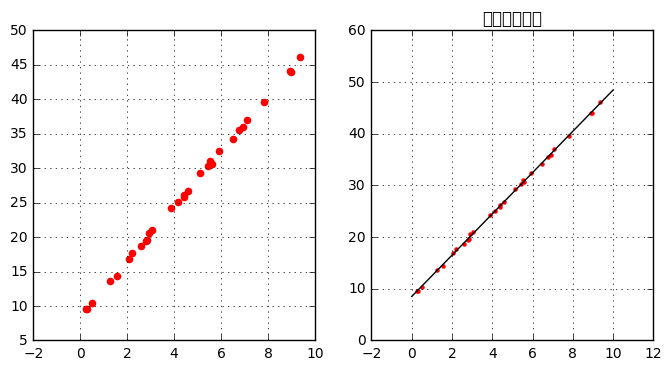

In [13]:
# 简单线性回归（一元线性回归）
# （1）数据示例

from sklearn.linear_model import LinearRegression
# 导入线性回归模块

rng = np.random.RandomState(3)
xtrain =  10*rng.rand(30)
ytrain = 8 + 4*xtrain + rng.rand(30)
# np.random.RandomState → 随机数种子，对于一个随机数发生器，只要该种子（seed）相同，产生的随机数序列就是相同的
# 生成随机数据x与y
# 样本关系：y = 8 + 4*x

fig = plt.figure(figsize = (8,4))
ax = fig.add_subplot(1,2,1)
plt.scatter(xtrain,ytrain,color ='r')
plt.grid()


model = LinearRegression()
model.fit(xtrain[:,np.newaxis],ytrain)

xtest = np.linspace(0,10,10000)
ytest = model.predict(xtest[:,np.newaxis])

ax2 = fig.add_subplot(1,2,2)
plt.scatter(xtrain,ytrain,marker = '.',color = 'r')
plt.plot(xtest,ytest,color = 'black')
plt.grid()
plt.title('线性回归拟合')


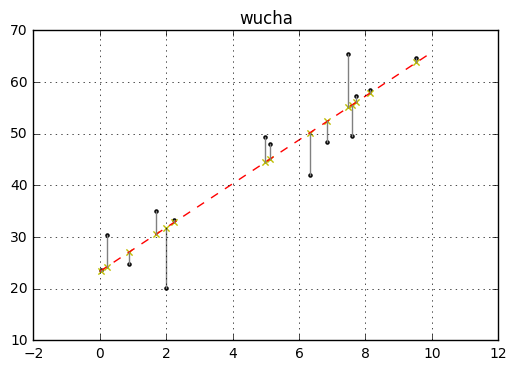

In [25]:
# 简单线性回归（一元线性回归）
# （2）误差

rng = np.random.RandomState(10)
xtrain = 10 * rng.rand(15)
ytrain = 8 + 4 * xtrain + rng.rand(15) * 30
model = LinearRegression()
model.fit(xtrain[:,np.newaxis],ytrain)

xtest = np.linspace(0,10,10000)
ytest = model.predict(xtest[:,np.newaxis])
plt.scatter(xtrain[:,np.newaxis],ytrain,marker ='.',color = 'black')
plt.plot(xtest,ytest,color = 'r',linestyle = '--')
plt.grid()
ytest2 = model.predict(xtrain[:,np.newaxis])
plt.scatter(xtrain,ytest2,marker = 'x',color = 'y')
plt.plot([xtrain,xtrain],[ytrain,ytest2],color = 'gray')
plt.title('wucha')

In [29]:
# 简单线性回归（一元线性回归）
# （3）求解a，b
rng = np.random.RandomState(8)
xtrain = 10 * rng.rand(30)
ytrain = 10 + 2 * xtrain + rng.rand(30)

model = LinearRegression()
model.fit(xtrain[:,np.newaxis],ytrain)

print('斜率a为：%.4f'%model.coef_[0])
print('截距b为：%.4f'%model.intercept_)
print('线性回归函数为：y = %.4fx + %.4fy'%(model.coef_[0],model.intercept_))

斜率a为：2.0062
截距b为：10.4531
线性回归函数为：y = 2.0062x + 10.4531y


斜率a为: [ 1.5  2.   4.   5. ]
截距b为：10.0000
线性回归方程为：y = 1.5000x1 + 2.0000x2 + 4.0000x3 +5.0000x4 + 10.0000


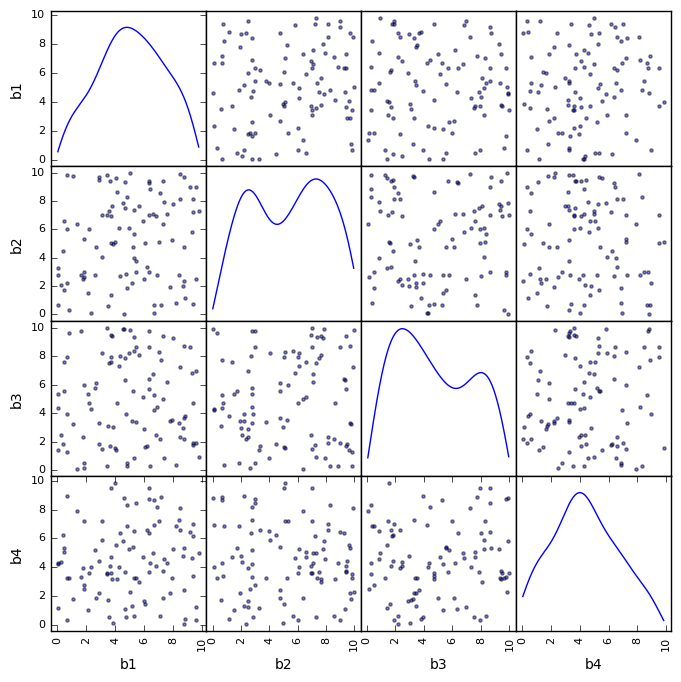

In [46]:
#多元线性回归
rng = np.random.RandomState(8)
xtrain  = 10 * rng.rand(100,4)
ytrain = 10 + np.dot(xtrain,[1.5,2,4,5])
df = pd.DataFrame(xtrain, columns = ['b1','b2','b3','b4'])
df['y'] = ytrain
pd.scatter_matrix(df[['b1','b2','b3','b4']],figsize = (8,8),
                  diagonal = 'kde',
                  alpha = 0.5,
                  range_padding = 0.1)
df.head()
# 创建数据，其中包括4个自变量
# 4个变量相互独立

model = LinearRegression()
model.fit(df[['b1','b2','b3','b4']],df['y'])
print('斜率a为:',model.coef_)
print('截距b为：%.4f'% model.intercept_)
print('线性回归方程为：y = %.4fx1 + %.4fx2 + %.4fx3 +%.4fx4 + %.4f' % (model.coef_[0],model.coef_[1],model.coef_[2],model.coef_[3],model.intercept_))

In [47]:
'''
【课程3.2.3】  线性回归模型评估

通过几个参数验证回归模型

SSE(和方差、误差平方和)：The sum of squares due to error
MSE(均方差、方差)：Mean squared error
RMSE(均方根、标准差)：Root mean squared error
R-square(确定系数) Coefficient of determination

'''

'\n【课程3.2.3】  线性回归模型评估\n\n通过几个参数验证回归模型\n\nSSE(和方差、误差平方和)：The sum of squares due to error\nMSE(均方差、方差)：Mean squared error\nRMSE(均方根、标准差)：Root mean squared error\nR-square(确定系数) Coefficient of determination\n\n'

In [55]:
# 模型评价
# MSE, RMES, R-square

from sklearn import metrics

rng = np.random.RandomState(1)
xtrain = 10 * rng.rand(30)
ytrain = 10 + 5 * xtrain + rng.rand(30)

model = LinearRegression()
model.fit(xtrain[:,np.newaxis],ytrain)
ytest = model.predict(xtrain[:,np.newaxis])
mse = metrics.mean_squared_error(ytrain,ytest) #求出均方差
rmse = np.sqrt(mse)#求出均方根
print('均方差为：',mse)
print('均方根为:',rmse)

ssr = ((ytest - ytrain.mean())**2).sum()
sst = ((ytrain - ytrain.mean())**2).sum()
r2 = ssr / sst  #求出确定系数，越接近1越好
print('确定系数为：',r2)

#另外一种求解确定系数的方法
r22 = model.score(xtrain[:,np.newaxis],ytrain)
print('这种方法求解的确定系数为：',r22)

均方差为： 0.087189650197
均方根为: 0.295278936257
确定系数为： 0.999615424332
这种方法求解的确定系数为： 0.999615424332
